## Entropy

Entropy measures the uncertainity/randomness in outcome of an event. Entropy is calculated using below formula,

**$ Entropy(X) = - \sum_{i=0}^n p_i . log_2(p_i)$** where $p_i$ is the probability of being a certain class

Lets imagine **X is a random variable representing the outcomes of an experiment 'Tossing a coin 8 times'**.  

Suppose we have received 6 Heads and 2 Tails on tossing a coin 8 times, now if we ask what would we get on next toss of same coin. we would guess Heads because we have seen that the coin results Heads more number of times than Tails. This means outcomes are not random/uncertain.

Now suppose we have received 4 Heads and 4 Tails on tossing a coin 8 times, now if we ask what would we get on next toss of same coin. we would not be able to guess because we have seen that the coin results equal number of Heads and Tails, We are uncertain about the outcomes.This means outcomes are random/uncertain.

Lets try to calculate Entropy for each scenario as depicted below, We are going to use **scipy** to calculate the log.

Scenario 1: When we have equal number of Heads and Tails in the X.
    
            X = ['H','T','T','H','T','H','T','H']
            Probability of Getting Head = pH = 4/8
            Probability of Getting Tail = pT = 4/8
            logPH = sc.log(pH)
            logPT = sc.log(pT)

            Entropy = (-pH * logPH - pT * logPT) = 0.6931 

Scenario 2: When we have 5 Heads and 3 Tails

            X = ['H','T','H','H','T','H','T','H']
            Probability of Getting Head = pH = 5/8
            Probability of Getting Tail = pT = 3/8
            logPH = sc.log(pH)
            logPT = sc.log(pT)

            Entropy = (-pH * logPH - pT * logPT) = 0.6615. 

Scenario 3: When we have 7 Heads and 1 Tail

            X = ['H','H','H','H','H','H','T','H']
            Probability of Getting Head = pH = 7/8
            Probability of Getting Tail = pT = 1/8
            logPH = sc.log(pH)
            logPT = sc.log(pT)

            Entropy = (-pH * logPH - pT * logPT) = 0.3761. 

Notice,   *Entropy(H=4, T=4) > Entropy(H=5, T=3) > Entropy(H=7, T=1)* 

The greater the randomness of an outcome the more the Entropy. Which means increasing the renadomness in outcome of an experiment increases the Entropy of the variable.

**Also when we have all Heads in X , it means X is Homogeneous OR Pure. and when X has mix of Head and tails it is Heterogeneous or Impure. Entropy is maximized when X is Impure/Heterogeneous, and Entropy is minimized when X is pure/homogeneous.**  

## Information Gain

Suppose we have set of examples T in the form of $(x,y) = (x_1,x_2,x_3,...,x_n, y)$ where $x_i$ is the ith feature and y is class label. We have seen entropy measures the impurity/uncertainity.

**Information Gain measures the reduction in Impurity in target variable when additional informations(features) are given.**

Information Gain is calculated as ,$IG(Y, X) = E(Y) - E(Y|X)$ where E(Y) is the entropy of random variable Y, $E(Y|X)$ is the **conditional Entropy** i.e. entropy of Y given X and can be calculated as,

 **$E(Y|X) = \sum_{v \in vals(a)} \frac{|S_a (v)|} {|T|} . E(S_a (v))$** where $S_a (v)$ be defined as the set of training inputs of T such for which attribute a is equal to v. 

## Understanding Entropy and Information Gain with Example

Consider the database of an Electronic store to see whether a person buys a laptop or not. The table below having class-labeled training tuples from the electronic store. Each attribute taken is of a discrete value. The class-labeled attribute is **buys _laptop**, has two distinct values (yes, no). Therefore there are two distinct classes.

<img src='Deceission_Tree_Example_DS.png'>



We can see there are Total 14 examples in the dataset. And there are 9 yes and 5 No in the buys_laptop target variable, therefore 9 tuples belongs to class 'yes' and 5 tuples belongs to 'no'.

$ Entropy(buys\_laptop) = - \sum_{i=0}^n p_i . log(p_i)$
$= - \frac{9} {14} . log(\frac{9}{14}) - \frac{5} {14} . log(\frac{5}{14}) = .9402859586706311$

$ Entropy(Age_{youth})= - \frac{5} {14} . log(\frac{5}{14}) - \frac{9} {14} . log(\frac{9}{14}) = .9402859586706311$  
$ Entropy(Age_{middle\_aged})= - \frac{4} {14} . log(\frac{4}{14}) - \frac{10} {14} . log(\frac{10}{14}) = 0.863120568566631$  
$ Entropy(Age_{senior})= - \frac{5} {14} . log(\frac{5}{14}) - \frac{9} {14} . log(\frac{9}{14}) = .9402859586706311$


**Entropy on Y when attribute Age is given**,  

$Entropy(buys\_laptop | Age) : $    

$= \sum_{v \in {youth, middle\_aged, senior}} \frac{|S_v|}{|S|} . Entropy(S_v)$  
$ = \frac{5}{14} . Entropy(S_{youth}) + \frac{4}{14} . Entropy(S_{middle\_aged}) + \frac{5}{14} . Entropy(S_{senior})$
$ = \frac{5}{14} . 0.9402859586706311 + \frac{4}{14} . 0.863120568566631 + \frac{5}{14} . 0.9402859586706311$  
$ = 0.9182387043552025 $

**Information Gain on Y when Age is given**,

**$IG(buys\_laptop | Age) = Entropy(buys\_laptop) - Entropy(buys\_laptop | Age)$**  
$=0.9402859586706311 - 0.9182387043552025$  
$=0.022047254315428644$

**Information Gain is used to determine which feature/attribute gives us the maximum information about a class. Higher the information gain better the feature on giving information about the class** 

# Gini - Index

Decision Tree is constructed in top down approach. At every step in the tree a feature is selected which splits the data set into subsets. Now how do we measure the quality of split? The idea to measure the best split is homogeneity/purity. A set of items is Pure when all belongs to a single class.

Gini Index is used to measure the quality of best split. When an attribute splits the data set into subsets then Gini impurity is a measure of how often a randomly chosen element from the subset would be incorrectly labeled if it was randomly labeled according to the distribution of labels in the subset.

Suppose there are N classes in the dataset, $P_i$ is the probability of an data instance is classified as classs i, abd $Q_i$ is the probability of same data instance is  missclassified.

Then Gini Impurity can is calculated as ,  
$G = \sum_{i = 1}^ N P_i . Q_i$  

$= \sum_{i = 1}^ N (P_i . (1 - P_i))$  

$= \sum_{i = 1}^ N (P_i - P_i^2)$  

$= \sum_{i = 1}^ N P_i . \sum_{i = 1}^ N P_i^2$  

$= 1 - \sum_{i = 1}^ N P_i^2$


The degree of Gini index varies between 0 and 1, where 0 denotes that all elements belong to a certain class or if there exists only one class, and 1 denotes that the elements are randomly distributed across various classes. A Gini Index of 0.5 denotes equally distributed elements into some classes.

Lets try to understand with same Electronic Store example,

**First calculating the Gini Impurity of whole Electornic Data Set (T):**
We can see there are Total 14 examples in the dataset. And there are **9 yes and 5 No** in the buys_laptop target variable.  
$= 1 - \sum_{i = 1}^ N P_i^2$  
$= 1 - (\frac{9}{14}^2 + \frac{5}{14}^2)$  
$= 1 - 0.5408163265306123$  
$= 0.4591836734693877$

**Now lets try to investigate the quality of split when we split the electronic data set on attribute 'Salary'.**,  
Feature salary has three values low, medium and high. Lets consider splitting T into D1 and D2 where D1 is all data instances belongs to label ${low , medium}$ and D2 belongs to all instances with label ${high}$

$Gini_{salary \in {low, medium}}(T) = \frac{10}{14}Gini(D_1) + \frac{4}{14}Gini(D_2)$  ,

There are 5 Yes and 3 No in the target variable for {low, medium} salry values. hence,  
$Gini(D_1) = 1 - \frac{7}{10}^2 - \frac{3}{10}^2 =  0.42000000000000004$ 

There are 2 Yes and 2 No in the target variable for High salry value.hence,  
$Gini(D_2) = 1 - \frac{2}{4}^2 - \frac{2}{4}^2 = 0.5$ 

Hence  
$Gini_{salary \in {low, medium}}(T) = \frac{10}{14}Gini(D_1) + \frac{4}{14}Gini(D_2)$  

$= \frac{10}{14}Gini(D_1) .(0.42000000000000004) + \frac{4}{14}Gini(D_2) . (0.5)$  

$= 0.4428571428571429 $


Lets consider splitting T into D1 and D2 where D1 is all data instances belongs to label ${low , high}$ and D2 belongs to all instances with label ${medium}$  
$Gini_{salary \in {low, high}}(T) = \frac{8}{14}Gini(D_1) + \frac{6}{14}Gini(D_2)$  ,

There are 5 Yes and 3 No in the target variable for {low, high} salry values. hence,  
$Gini(D_1) = 1 - \frac{5}{8}^2 - \frac{3}{8}^2 =  0.46875$ 

There are 4 Yes and 2 No in the target variable for medium salry value.hence,  
$Gini(D_2) = 1 - \frac{4}{6}^2 - \frac{2}{6}^2 = 0.4444444444444445$ 

Hence  
$Gini_{salary \in {low, high}}(T) = \frac{8}{14}Gini(D_1) + \frac{6}{14}Gini(D_2)$  

$= \frac{8}{14}Gini(D_1) .(0.46875) + \frac{6}{14}Gini(D_2) . (0.4444444444444445)$  

$= 0.4583333333333333 $

Lets consider splitting T into D1 and D2 where D1 is all data instances belongs to label ${high, medium}$ and D2 belongs to all instances with label ${low}$  
$Gini_{salary \in {medium, high}}(T) = \frac{10}{14}Gini(D_1) + \frac{4}{14}Gini(D_2)$  ,

There are 6 Yes and 4 No in the target variable for {medium, high} salry values. hence,  
$Gini(D_1) = 1 - \frac{6}{10}^2 - \frac{4}{10}^2 =  0.48$ 

There are 3 Yes and 1 No in the target variable for Low salry value.hence,  
$Gini(D_2) = 1 - \frac{3}{4}^2 - \frac{1}{4}^2 = 0.4647619047619047$ 

Hence  
$Gini_{salary \in {medium, high}}(T) = \frac{10}{14}Gini(D_1) + \frac{4}{14}Gini(D_2)$  

$= \frac{10}{14}Gini(D_1) .(0.46875) + \frac{4}{14}Gini(D_2) . (0.4444444444444445)$  

$= 0.47564625850340136 $


So we have clculated Gini Index values for all combinition of values in the Salary feature and same dpicted in the table  below 

| |(low, medium) and high | (low, high) and medium | (medium , high) and low |
| --- | --- | --- | --- |
| Gini Index |0.4428571428571429| 0.4583333333333333 | 0.47564625850340136 |

We can see the Gini Index is minimum when we splited T into D1 and D2 where D1 belongs to instances with salary values low, medium and D2 belongs to instances with salary value high. Hence this split is considered as best split by attribute Salary

# CART

CART (Classifications and Regressions Tree) is a type of Decission Tree which can builds both classification and regression trees. The classification tree is constructed by CART by the binary splitting of the attribute. Gini Index is used as a measure of selecting the splitting attribute. The CART is also used for regression analysis with the help of regression tree. The regression feature of CART can be used in forecasting a dependent variable given a set of predictor variable over a given period of time. 

<ul>
    <li>CART can handle missing values automatically using surrogate splits.</li>
    <li>Uses any combination of continuous/discrete variables. </li>
    <li>CART automatically performs variable selection.</li> 
</ul>



## Decission Tree Classifier on Titanic Data Set

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [254]:
training_data = pd.read_csv('Titanic_Training_DataSet.csv')
'''testing_data = pd.read_csv('Titanic_Testing_DataSet.csv')

full_data = pd.concat([training_data,testing_data], axis=0, sort=True, ignore_index=True)
full_data.head()'''

"testing_data = pd.read_csv('Titanic_Testing_DataSet.csv')\n\nfull_data = pd.concat([training_data,testing_data], axis=0, sort=True, ignore_index=True)\nfull_data.head()"

In [255]:
training_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Survived - 0 = No, 1 = Yes ,  
Pclass - Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd   
Sex - Male or female   
Age - Age in years   
sibsp - # of siblings / spouses aboard the Titanic   
parch - # of parents / children aboard the Titanic   
ticket - Ticket number  
Fare - Passenger fare   
Cabin  - Cabin number embarked Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton

### Creating new features

In [413]:
training_data['Has_Cabin'] = training_data.Cabin.apply(lambda x: 0 if type(x) == float else 1)

In [414]:
training_data['Family_Size'] = training_data.SibSp + training_data.Parch

#### Handling Missing Values

In [415]:
# Checking missing values
training_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Has_Cabin        0
Family_Size      0
dtype: int64

Next, handling missing values at feature 'Embarked'. It is a categorical feature , hence i am going to fill NaN values with most occured value in Embarked. Mode is the most occured value in a list of values.so i will fill NaN with mode of feature Embarked

In [416]:
mode_val = training_data.Embarked.mode()
print(mode_val)
full_data.Embarked = training_data.Embarked.fillna('S')

0    S
dtype: object


Feature 'Fare' is continuous hence using Median imputation to replace missing values.

In [417]:
med_val = training_data.Fare.median()
full_data.Fare = training_data.Fare.fillna(med_val)
training_data.Fare.isnull().sum()

0

To handle missing value in Age , i am using different approach. Replacing missing values with random value within range of (mean+std_dev, mean-std_dev) 

In [418]:
age_mean = training_data.Age.mean()
age_std = training_data.Age.std()
age_missing_count = training_data.Age.isnull().sum()
age_imputed_values = np.random.randint(age_mean - age_std, age_mean + age_std , age_missing_count)
training_data['Age'][training_data.Age.isnull()] = age_imputed_values
training_data.Age.isnull().sum()

C:\Users\NMiyaX0106539\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0

#### Feature Elimination

Removing Feature 'Cabin' because we have derived new feature 'Has_Cabin' from 'Cabin'

In [419]:
training_data.drop('Cabin',axis=1, inplace=True)

Removing feature 'Ticket' as this is not so usefull for the model

In [420]:
training_data.drop('Ticket', axis=1, inplace=True)

Removing feature 'Name'

In [421]:
training_data.drop('Name', axis=1, inplace=True)

Removing features - Parch, PassengerId, SibSp

In [422]:
training_data.drop(['Parch','SibSp','PassengerId'], axis=1, inplace=True)

#### Categorical Data Conversion

Encoding on feature Embarked

In [423]:
training_data['Embarked'] = training_data['Embarked'].apply(lambda x : 0 if x=='S' else (1 if x== 'C' else 2))
training_data.Embarked.value_counts()

0    644
1    168
2     79
Name: Embarked, dtype: int64

Encoding feature Sex : 0 - Female , 1 - Male

In [424]:
training_data.Sex = training_data.Sex.map({'female' : 0, 'male': 1}).astype(int)
training_data.Sex.value_counts()

1    577
0    314
Name: Sex, dtype: int64

In [425]:
training_data.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Has_Cabin,Family_Size
0,0,3,1,22.0,7.2500,0,0,1
1,1,1,0,38.0,71.2833,1,1,1
2,1,3,0,26.0,7.9250,0,0,0
3,1,1,0,35.0,53.1000,0,1,1
4,0,3,1,35.0,8.0500,0,0,0
5,0,3,1,28.0,8.4583,2,0,0
6,0,1,1,54.0,51.8625,0,1,0
7,0,3,1,2.0,21.0750,0,0,4
8,1,3,0,27.0,11.1333,0,0,2
9,1,2,0,14.0,30.0708,1,0,1


#### Checking Multicolinearity

In [426]:
import seaborn as sns
import matplotlib.pyplot as plt

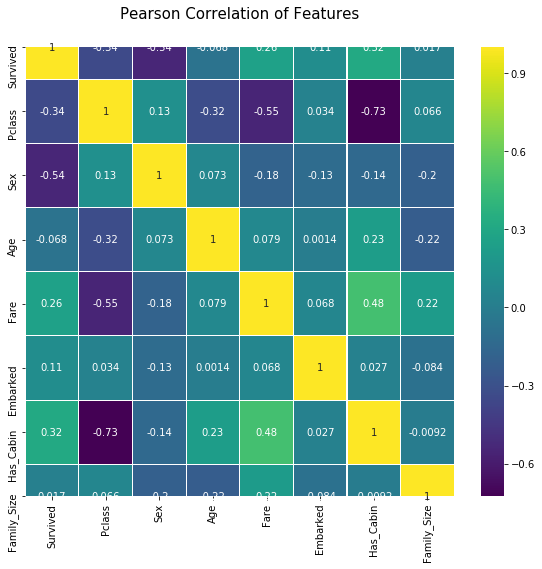

In [427]:
plt.figure(figsize=(8,8))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(training_data.corr(),linewidths=0.1,vmax=1.0,  cmap=plt.cm.viridis, linecolor='white', annot=True)
plt.tight_layout()
plt.show()

#### Train Test Splitting

In [428]:
X = training_data.drop('Survived', axis=1)
Y = training_data.Survived

In [429]:
from sklearn.model_selection import train_test_split

In [430]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X,Y, test_size=0.2)

In [431]:
print(X_Train.shape)
print(X_Test.shape)
print(Y_Train.shape)
print(Y_Test.shape)

(712, 7)
(179, 7)
(712,)
(179,)


#### DecissionTree Classifier

In [432]:
from sklearn.tree import DecisionTreeClassifier

In [433]:
#Training the model with Train Data
clf = DecisionTreeClassifier()
clf.fit(X_Train,Y_Train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [434]:
# Predicting
Y_Pred = clf.predict(X_Test)

In [435]:
# Evaluating
from sklearn.metrics import confusion_matrix, accuracy_score
matrix = confusion_matrix(Y_Test,Y_Pred)

print('Confusion Matrix ... ', )
print(matrix)

print('Accuracy ... ', accuracy_score(Y_Test, Y_Pred))

Confusion Matrix ... 
[[84 19]
 [24 52]]
Accuracy ...  0.7597765363128491


In [436]:
print('Depth of the tree ', clf.get_depth())

Depth of the tree  19


In [437]:
print('Number of leaf nodes : ', clf.get_n_leaves())

Number of leaf nodes :  158


In [438]:
print('Feature Importance ... ')
    
dict(zip(X_Train,clf.feature_importances_))

Feature Importance ... 


{'Pclass': 0.1038855670561126,
 'Sex': 0.2942233894952591,
 'Age': 0.2504826582813624,
 'Fare': 0.2157029462808657,
 'Embarked': 0.02005861488015711,
 'Has_Cabin': 0.043301423007911156,
 'Family_Size': 0.07234540099833196}

## Overfitting Problem

Decision tree tends to be overfitted when it grows very large. More the depth more the nodes in the tree and more splits it has and it captures more accurate information on training data which causes overfitting problem. Overfitting means the tree fits every training data so well that accuracy on training data goes very high but when predicting on test data accuracy goes down.

One way to overcome overfitting problem is to controle **max_depth** parameter while building the tree. this parameter indicates how deep the tree can be grown. Now if tree is grown very large then overfitting can appear, again if tree is grown very small then it can cause poor model. then how to select the right depth of tree? answer is observing the tree accuracy for list of max_depth values and then selecting the right depth for which accuracy is high. This can be achieved using cross validation.

**Cross Validation** is a model validation technique that splits the training dataset in a given number of "folds". Each split uses different data for training and testing purposes, allowing the model to be trained and tested with different data each time.  
This allows the algorithm to be trained and tested with all available data across all folds, avoiding any splitting bias and giving a good idea of the generalisation of the chosen model. The main downside is that Cross Validation requires the model to be trained for each fold, so the computational cost can be very high for complex models or huge datasets.

##### k-fold cross-validation

In k-fold cross-validation, the original sample is randomly partitioned into k equal sized subsamples. Of the k subsamples, a single subsample is retained as the validation data for testing the model, and the remaining k − 1 subsamples are used as training data. The cross-validation process is then repeated k times, with each of the k subsamples used exactly once as the validation data. The k results can then be averaged to produce a single estimation. The advantage of this method over repeated random sub-sampling (see below) is that all observations are used for both training and validation, and each observation is used for validation exactly once. 10-fold cross-validation is commonly used but in general k remains an unfixed parameter.

For example, setting k = 2 results in 2-fold cross-validation. In 2-fold cross-validation, we randomly shuffle the dataset into two sets d0 and d1, so that both sets are equal size (this is usually implemented by shuffling the data array and then splitting it in two). We then train on d0 and validate on d1, followed by training on d1 and validating on d0.

In [439]:
from sklearn.model_selection import KFold

In [462]:
cv = KFold(n_splits=10)
max_attributes = 7
depth_range = range(1,max_attributes+ 1)
print(training_data.shape)
model_accuracy = []
for depth in depth_range:
    
    tree = DecisionTreeClassifier(max_depth= depth)
    
    fold_accuracy = []
    for train_fold_indices , val_fold_indices in cv.split(training_data):
        t_data = training_data.loc[train_fold_indices]
        v_data = training_data.loc[val_fold_indices]
        
        
        features = t_data.drop('Survived', axis=1)
        target = t_data.Survived
        tree.fit(features, target)
        
        validation_score = tree.score(X= v_data.drop('Survived', axis=1),
                                     y= v_data.Survived)
        fold_accuracy.append(validation_score)
        
    avg_accuracy = sum(fold_accuracy)/10
    
    print('Depth {} : Accuracy : {}'.format(depth,avg_accuracy))
    


(891, 8)
Depth 1 : Accuracy : 0.7867290886392011
Depth 2 : Accuracy : 0.7666541822721598
Depth 3 : Accuracy : 0.8058426966292137
Depth 4 : Accuracy : 0.7969662921348315
Depth 5 : Accuracy : 0.7946816479400749
Depth 6 : Accuracy : 0.8047815230961298
Depth 7 : Accuracy : 0.794681647940075


From above Cross Validation experiment we can see decision tree model has highest average accuracy when tree is grown with depth 3.
Hence we will rebuild our decission tree model with depth 3 as shown below,

#### Rebuilding the tree with depth = 3

In [463]:
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X_Train,Y_Train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [464]:
Y_Pred = clf.predict(X_Test)

In [465]:
matrix = confusion_matrix(Y_Test,Y_Pred)
print(matrix)

print(accuracy_score(Y_Test,Y_Pred))

[[90 13]
 [21 55]]
0.8100558659217877


We have achieved slightly better accuracy of 81%

In [466]:
print('Depth of the tree ', clf.get_depth())

Depth of the tree  3


In [474]:
print('Feature Importance ... ')
    
dict(zip(X_Train,clf.feature_importances_))

Feature Importance ... 


{'Pclass': 0.1806292927924297,
 'Sex': 0.6045762763608254,
 'Age': 0.07098162066684388,
 'Fare': 0.0026524896748327184,
 'Embarked': 0.0,
 'Has_Cabin': 0.08686858817571945,
 'Family_Size': 0.0542917323293487}

#### Drawing the Tree

In [477]:
X_Train

,Pclass,Sex,Age,Fare,Embarked,Has_Cabin,Family_Size
158,3,1,36.0,8.6625,0,0,0
768,3,1,22.0,24.1500,2,0,1
145,2,1,19.0,36.7500,0,0,2
594,2,1,37.0,26.0000,0,0,1
684,2,1,60.0,39.0000,0,0,2
...,...,...,...,...,...,...,...
34,1,1,28.0,82.1708,1,0,1
531,3,1,34.0,7.2292,1,0,0
731,3,1,11.0,18.7875,1,0,0
379,3,1,19.0,7.7750,0,0,0


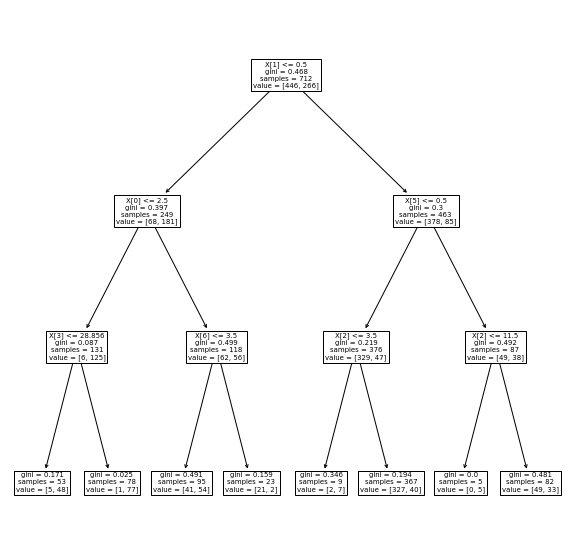

In [473]:
from sklearn import tree
plt.subplots(figsize=(10,10))
tree.plot_tree(clf)
plt.show()

# Decision Tree Classifier on Bank Marketting Data 

The aim of this attempt is to predict if the client will subscribe (yes/no) to a term deposit, by building a classification model using Decision Tree.

In [253]:
bank_data = pd.read_csv('Bank_Marketting_Data.csv')
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [114]:
bank_data.shape

(11162, 17)

In [115]:
bank_data.job.value_counts()

management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64

In [116]:
bank_data.marital.value_counts()

married     6351
single      3518
divorced    1293
Name: marital, dtype: int64

In [117]:
bank_data.education.value_counts()

secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: education, dtype: int64

In [118]:
bank_data.default.value_counts()

no     10994
yes      168
Name: default, dtype: int64

In [119]:
bank_data.housing.value_counts()

no     5881
yes    5281
Name: housing, dtype: int64

In [120]:
bank_data.loan.value_counts()

no     9702
yes    1460
Name: loan, dtype: int64

In [121]:
# replacing 'unknown' to 'other' 
print(bank_data.poutcome.value_counts())
bank_data.poutcome = bank_data.poutcome.replace('unknown','other')
print(bank_data.poutcome.value_counts())

unknown    8326
failure    1228
success    1071
other       537
Name: poutcome, dtype: int64
other      8863
failure    1228
success    1071
Name: poutcome, dtype: int64


In [122]:
# Checking Missing Values
bank_data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

#### Feature Elimination

In [123]:
bank_data.drop(['contact','month','pdays'], axis=1, inplace=True)

#### Categorical Data Conversion

In [124]:
bank_data.marital = bank_data.marital.map({'married': 0, 'single': 1, 'divorced':2})

In [125]:
bank_data.education = bank_data.education.map({'secondary':0, 'tertiary':1, 'primary':2,'unknown':3})

In [126]:
bank_data.default = bank_data.default.map({'no':0,'yes':1})

In [127]:
bank_data.housing = bank_data.housing.map({'no':0, 'yes':1})

In [128]:
bank_data.loan = bank_data.loan.map({'no':0, 'yes':1})

In [129]:
# Dummy_Variables 
bank_data_encoded = pd.get_dummies(data=bank_data, columns=['job','poutcome'])
bank_data_encoded.shape
bank_data_encoded.dtypes

age                   int64
marital               int64
education             int64
default               int64
balance               int64
housing               int64
loan                  int64
day                   int64
duration              int64
campaign              int64
previous              int64
deposit              object
job_admin.            uint8
job_blue-collar       uint8
job_entrepreneur      uint8
job_housemaid         uint8
job_management        uint8
job_retired           uint8
job_self-employed     uint8
job_services          uint8
job_student           uint8
job_technician        uint8
job_unemployed        uint8
job_unknown           uint8
poutcome_failure      uint8
poutcome_other        uint8
poutcome_success      uint8
dtype: object

In [130]:
bank_data_encoded.head()

,age,marital,education,default,balance,housing,loan,day,duration,campaign,...,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,poutcome_failure,poutcome_other,poutcome_success
0,59,0,0,0,2343,1,0,5,1042,1,...,0,0,0,0,0,0,0,0,1,0
1,56,0,0,0,45,0,0,5,1467,1,...,0,0,0,0,0,0,0,0,1,0
2,41,0,0,0,1270,1,0,5,1389,1,...,0,0,0,0,1,0,0,0,1,0
3,55,0,0,0,2476,1,0,5,579,1,...,0,0,1,0,0,0,0,0,1,0
4,54,0,1,0,184,0,0,5,673,2,...,0,0,0,0,0,0,0,0,1,0


#### Checking Multicolineariry

In [131]:
import matplotlib.pyplot as plt
import seaborn as sns

In [132]:
corr_matrx = bank_data_encoded.corr()
corr_matrx[corr_matrx > 0.9].count()

age                  1
marital              1
education            1
default              1
balance              1
housing              1
loan                 1
day                  1
duration             1
campaign             1
previous             1
job_admin.           1
job_blue-collar      1
job_entrepreneur     1
job_housemaid        1
job_management       1
job_retired          1
job_self-employed    1
job_services         1
job_student          1
job_technician       1
job_unemployed       1
job_unknown          1
poutcome_failure     1
poutcome_other       1
poutcome_success     1
dtype: int64

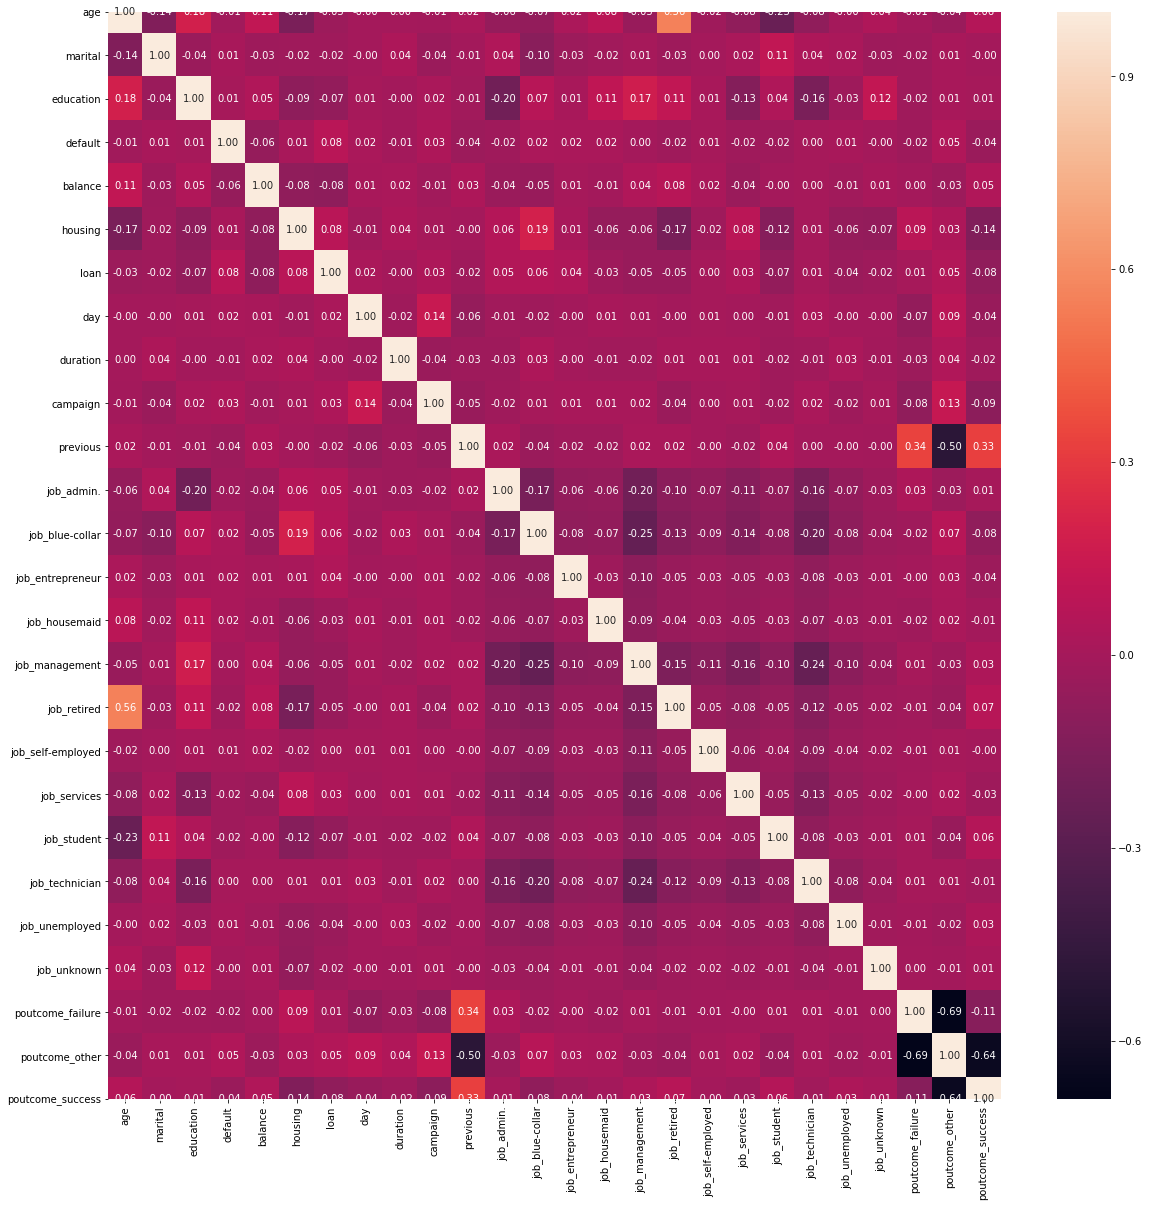

In [133]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(bank_data_encoded.corr(), fmt='.2f', cbar=True, annot=True, ax=ax)
plt.show()

#### Seperating Features and Target variable

In [134]:
X = bank_data_encoded.drop(['deposit'], axis=1)
Y = bank_data_encoded.deposit

#### Train and Test Splitting

In [135]:
from sklearn.model_selection import train_test_split
X_Train,  X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size=0.25)
print('X_Train Shape ', X_Train.shape)
print('X_Test Shape ', X_Test.shape)
print('Y_Train Shape ', Y_Train.shape)
print('Y_Test Shape ', Y_Test.shape)

X_Train Shape  (8371, 26)
X_Test Shape  (2791, 26)
Y_Train Shape  (8371,)
Y_Test Shape  (2791,)


#### Decision Tree Classifier

In [136]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_Train,Y_Train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [137]:
Y_Pred = tree.predict(X_Test)

In [138]:
# Evaluating
from sklearn.metrics import confusion_matrix, accuracy_score
matrix = confusion_matrix(Y_Test,Y_Pred)

print('Confusion Matrix ... ', )
print(matrix)

print('Accuracy ... ', accuracy_score(Y_Test, Y_Pred))

Confusion Matrix ... 
[[1117  368]
 [ 370  936]]
Accuracy ...  0.7355786456467216


#### validating best 'max_depth' using cross_validation

###### Stratified K-fold validation

In stratified k-fold cross-validation, the partitions are selected so that the mean response value is approximately equal in all the partitions. In the case of binary classification, this means that each partition contains roughly the same proportions of the two types of class labels.

In [139]:
from sklearn.model_selection import StratifiedKFold

In [140]:
cv = StratifiedKFold(n_splits=10)

max_attributes = len(X_Train.columns)
depth_range = range(1, max_attributes+1)

for depth in depth_range:
    
    treeClf = DecisionTreeClassifier(max_depth=depth)
    
    score = []
    
    for train_indices, valid_indices in cv.split(X_Train,Y_Train):
        
        training_sample = bank_data_encoded.iloc[train_indices]
        validation_sample = bank_data_encoded.iloc[valid_indices]
        
        features = training_sample.drop('deposit', axis=1)
        target = training_sample.deposit
        
        treeClf.fit(features, target)
        
        validation_score = treeClf.score(X=validation_sample.drop('deposit', axis=1),
                                        y= validation_sample.deposit)
        score.append(validation_score)
    
    avg_accuracy = sum(score)/len(score)
    
    print('Depth ',depth,' Score ',avg_accuracy)


Depth  1  Score  0.6831983218750766
Depth  2  Score  0.7272807791109714
Depth  3  Score  0.7499516497465166
Depth  4  Score  0.7730968533646709
Depth  5  Score  0.7399925777243022
Depth  6  Score  0.7746458610058782
Depth  7  Score  0.7797915388731099
Depth  8  Score  0.7671262510773473
Depth  9  Score  0.7662937908706595
Depth  10  Score  0.756145461937306
Depth  11  Score  0.7514871077064391
Depth  12  Score  0.7427717549468345
Depth  13  Score  0.7314221154182903
Depth  14  Score  0.7228209581010128
Depth  15  Score  0.7155350151992047
Depth  16  Score  0.7173299860852282
Depth  17  Score  0.7150598278151552
Depth  18  Score  0.7142235038721336
Depth  19  Score  0.7124349565159805
Depth  20  Score  0.7084914443275364
Depth  21  Score  0.7094483793979522
Depth  22  Score  0.7094505206882685
Depth  23  Score  0.7034797956127137
Depth  24  Score  0.7074177427656688
Depth  25  Score  0.7072998370722964
Depth  26  Score  0.7120792431038754


we can see that avergae model accuracy is best when depth = 7. Hence we are going to rebuild the decision tree model with depth=7

In [141]:
from sklearn.tree import DecisionTreeClassifier
treeModel = DecisionTreeClassifier(max_depth=7)
treeModel.fit(X_Train,Y_Train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [142]:
Y_Pred = treeModel.predict(X_Test)
# Evaluating
from sklearn.metrics import confusion_matrix, accuracy_score
matrix = confusion_matrix(Y_Test,Y_Pred)

print('Confusion Matrix ... ', )
print(matrix)

print('Accuracy ... ', accuracy_score(Y_Test, Y_Pred))

Confusion Matrix ... 
[[1181  304]
 [ 299 1007]]
Accuracy ...  0.7839484055893945


We have achieved better accuracy of 79% when we used tree depth=7

In [143]:
print('Feature Importance ... ')
    
dict(zip(X_Train,treeModel.feature_importances_))

Feature Importance ... 


{'age': 0.050031656868701944,
 'marital': 0.005268359725432808,
 'education': 0.0004985681125206124,
 'default': 0.0,
 'balance': 0.04169766388846688,
 'housing': 0.0840604333334211,
 'loan': 0.004786202383267208,
 'day': 0.013033233229537606,
 'duration': 0.5500847957374667,
 'campaign': 0.007104302778038618,
 'previous': 0.060343970537692984,
 'job_admin.': 0.0005480382547782629,
 'job_blue-collar': 0.001810138418959834,
 'job_entrepreneur': 0.002252166564651183,
 'job_housemaid': 0.0008055309131369272,
 'job_management': 0.0,
 'job_retired': 0.0,
 'job_self-employed': 0.0,
 'job_services': 0.0002583552260853342,
 'job_student': 0.0006935493520493233,
 'job_technician': 0.0,
 'job_unemployed': 0.0017608710845156289,
 'job_unknown': 0.0,
 'poutcome_failure': 0.0,
 'poutcome_other': 0.0015087650333887657,
 'poutcome_success': 0.1734533985578883}

#### Lets draw the Tree

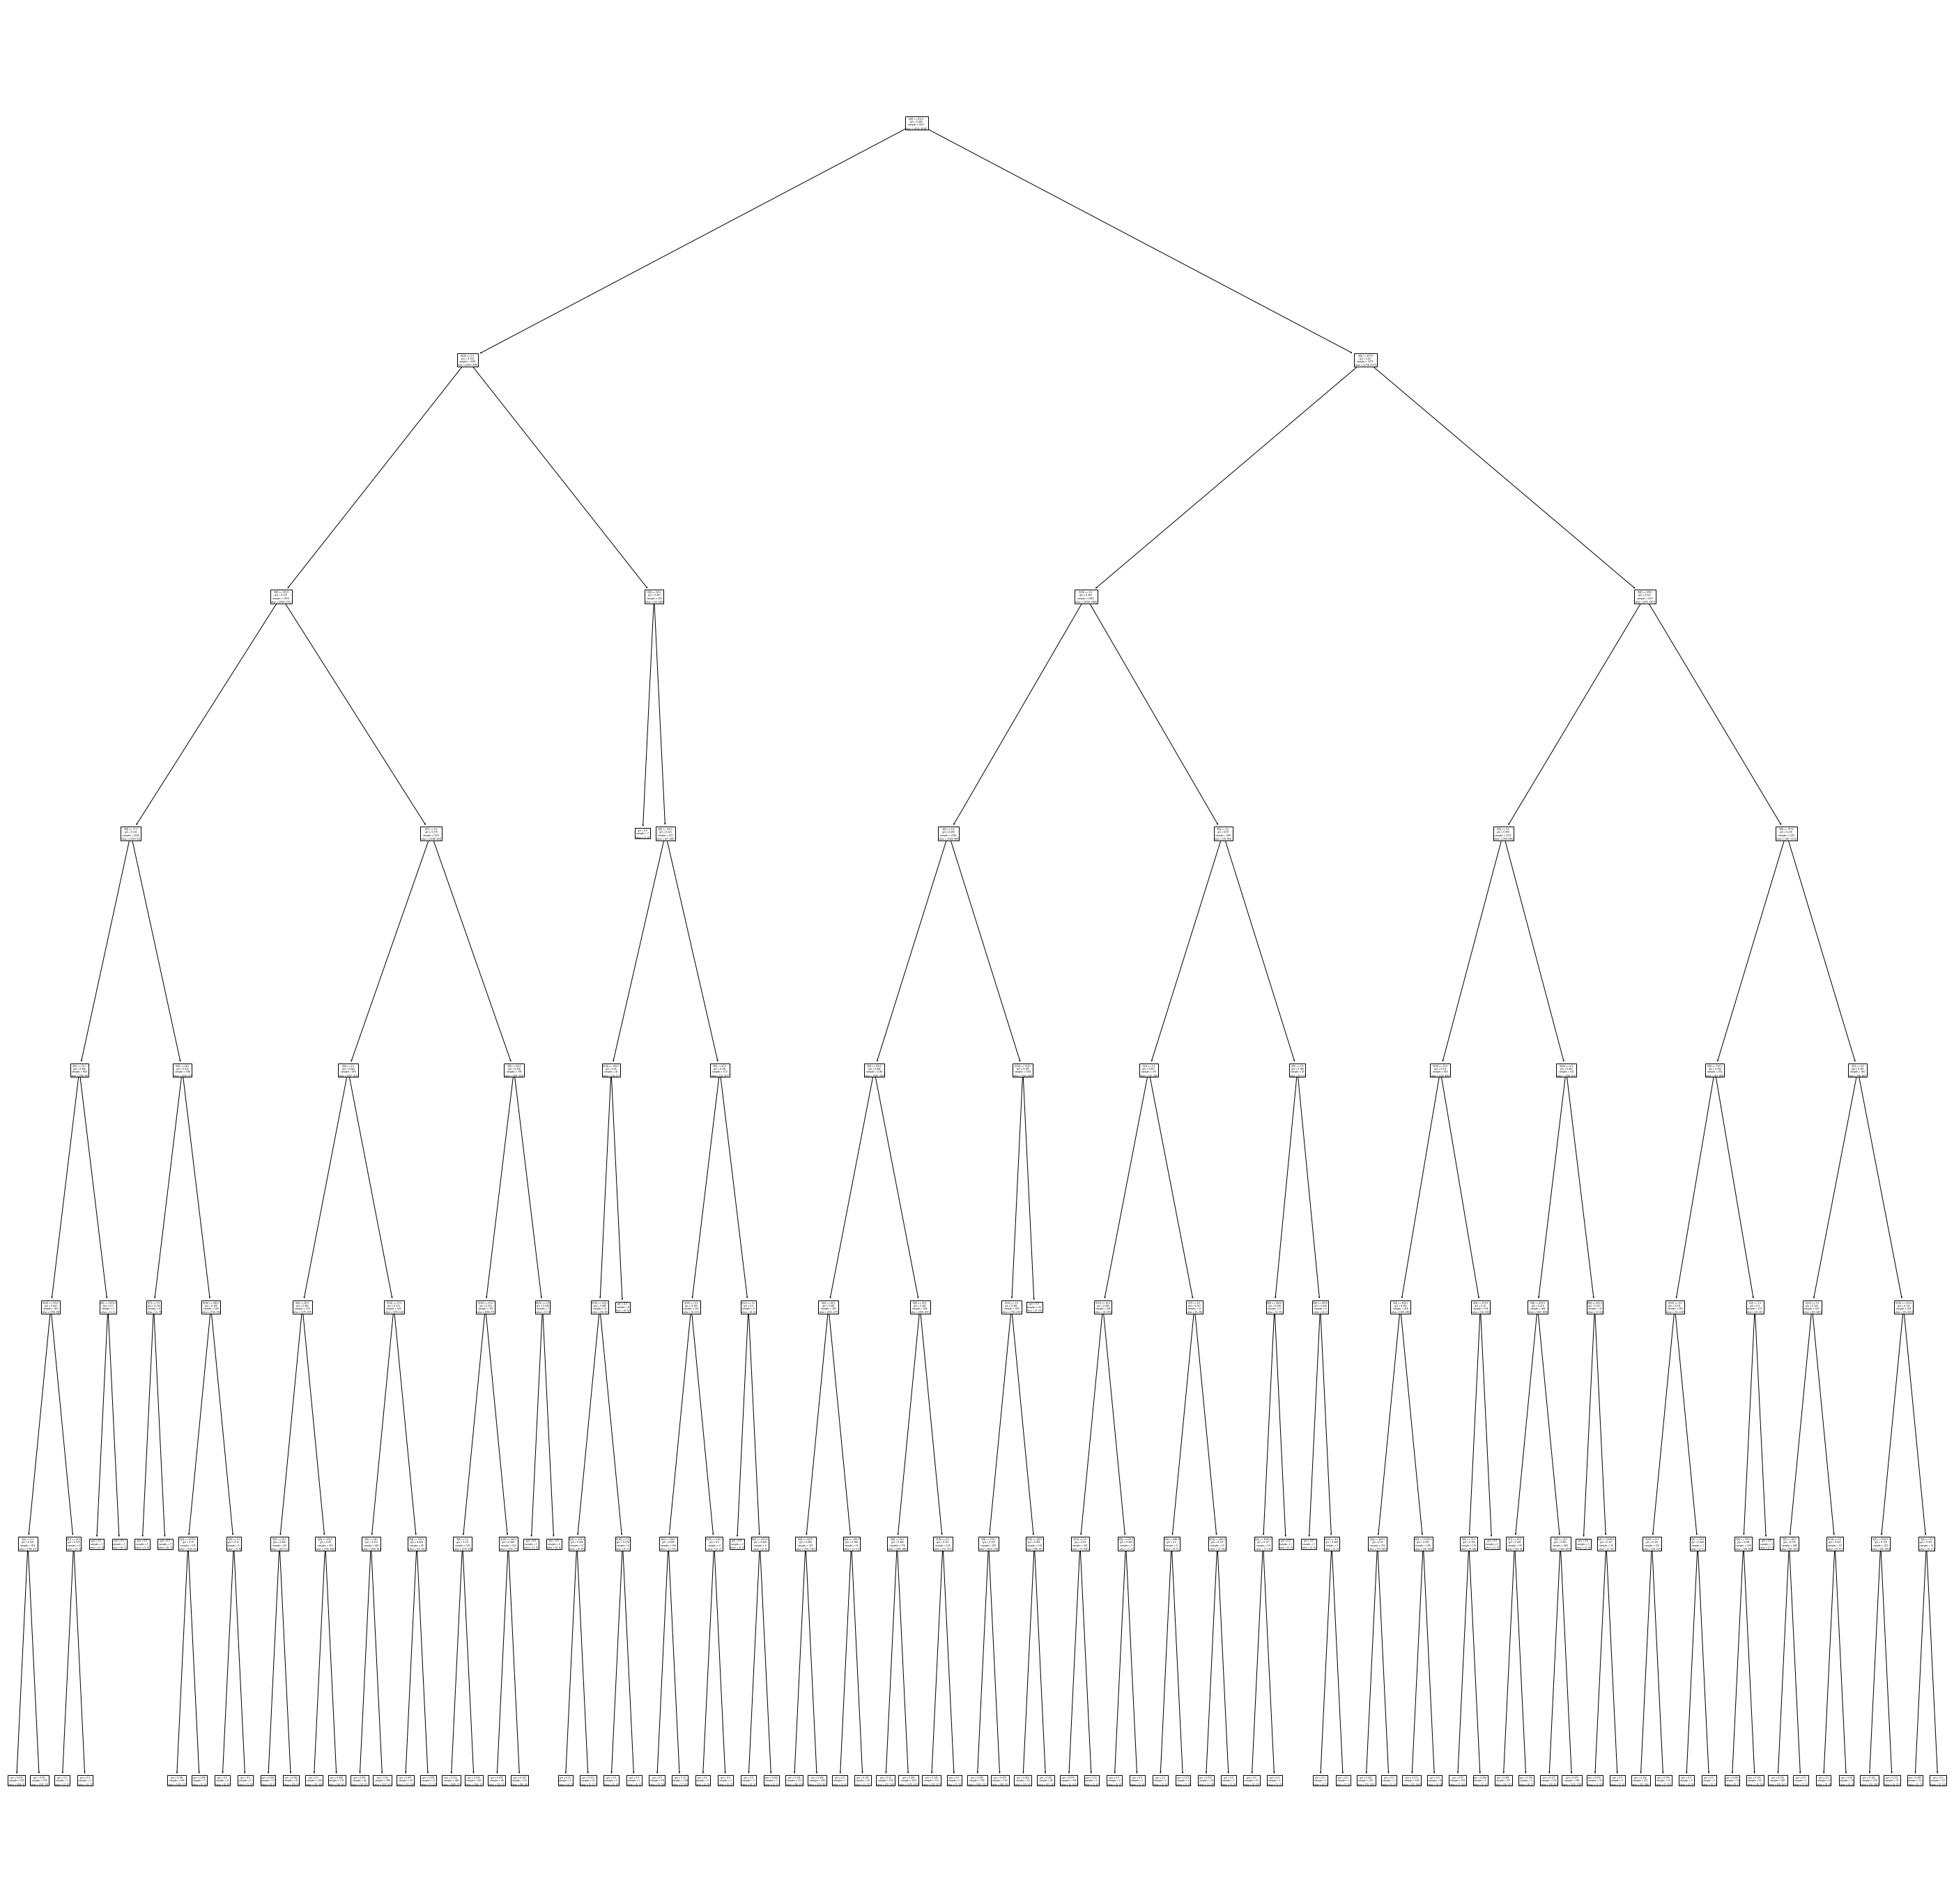

In [108]:
from sklearn import tree
plt.subplots(figsize=(50,50))
tree.plot_tree(treeModel)
plt.show()

# Decision Tree Regressor : Car Accident Prediction

In [83]:
car_data = pd.read_csv('Car_Accident_Prediction.csv')
car_data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [84]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
Make                 11914 non-null object
Model                11914 non-null object
Year                 11914 non-null int64
Engine Fuel Type     11911 non-null object
Engine HP            11845 non-null float64
Engine Cylinders     11884 non-null float64
Transmission Type    11914 non-null object
Driven_Wheels        11914 non-null object
Number of Doors      11908 non-null float64
Market Category      8172 non-null object
Vehicle Size         11914 non-null object
Vehicle Style        11914 non-null object
highway MPG          11914 non-null int64
city mpg             11914 non-null int64
Popularity           11914 non-null int64
MSRP                 11914 non-null int64
dtypes: float64(3), int64(5), object(8)
memory usage: 1.5+ MB


### Handling Missing Values

##### Checking for Missing Values

In [85]:
car_data.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

there are missing values for feature 'Engine HP', 'Engine Cylinders' , 'Number of Doors' and 'Market Category'.

In [86]:
car_data[['Engine HP','Engine Cylinders','Engine Fuel Type','Number of Doors','Market Category']].head()

,Engine HP,Engine Cylinders,Engine Fuel Type,Number of Doors,Market Category
0,335.0,6.0,premium unleaded (required),2.0,"Factory Tuner,Luxury,High-Performance"
1,300.0,6.0,premium unleaded (required),2.0,"Luxury,Performance"
2,300.0,6.0,premium unleaded (required),2.0,"Luxury,High-Performance"
3,230.0,6.0,premium unleaded (required),2.0,"Luxury,Performance"
4,230.0,6.0,premium unleaded (required),2.0,Luxury


#### Handling 'Engine Fuel  Type' : Mode Imputation

Replacing null values with mode of the feature. Mode is the most occured value in a list of values.

In [87]:
mode_fuel_type = car_data['Engine Fuel Type'].mode()

car_data['Engine Fuel Type'] = car_data['Engine Fuel Type'].fillna(str(mode_fuel_type))

##### handling 'Engine HP' : Median Imputation

Replacing null values with Median of the feature.

In [88]:
median_engn_hp = car_data['Engine HP'].median()
car_data['Engine HP'] = car_data['Engine HP'].fillna(median_engn_hp)

##### handling 'Engine Cylinders' : Linear Regression Imputation  

Step 1: Examining the relationship (to check if linear/non linear ) between 'Engine Cylinders' and target variable 'MSRP'.  
Step 2: Building a Linear Regression model to predict 'Engine Cyliders' count for given 'MSRP'  
> prepare data : with two variables 'Engine Cylinders' and 'MSRP'  
> prepare training data set: All  data instances for which Engine Cylinders value present.  
> prepare testing data set: All data instances for which Engine Cylinders are missing  
> prepare X : MSRP is to be the feature  
> prepare Y : Engine Cylinders is to be the target variable for this model.  

Step 3: Replace missing values at 'Engine Cylinders' with predicted value by the model.

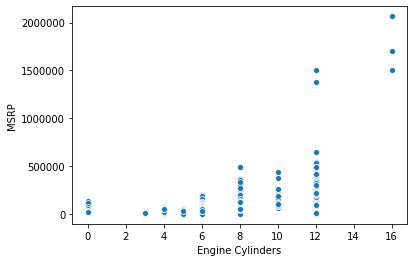

C:\Users\NMiyaX0106539\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [89]:
# Scatterplot : to examine relationship
sns.scatterplot(data=car_data, x='Engine Cylinders', y='MSRP')
plt.show()


# Data Preparation
data = car_data[['Engine Cylinders','MSRP']]
train_data = data[data['Engine Cylinders'].isnull()==False]
test_data = data[data['Engine Cylinders'].isnull()==True]
X_Train = train_data.MSRP.values.reshape(-1,1)
Y_Train = train_data['Engine Cylinders'].values.reshape(-1,1)

X_Test = test_data.MSRP.values.reshape(-1,1)

# Linear Regression Model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_Train, Y_Train)

# Prediction of Y for given X
Y_Pred = model.predict(X_Test) # Predicted Values of 'Engine Cylinders'
Y_Pred = np.round(Y_Pred).astype('int') #  Rounding of the values


# Replacing all missing values with predicted value
car_data['Engine Cylinders'][car_data['Engine Cylinders'].isnull()] = Y_Pred

##### Handling 'Number of Doors' : Deletion of missing records  
Since there are very few missing values at feature , we can delete records for such missing values.

In [90]:
# Number of Doors : Deletion of Missing Records
missing_indices = car_data[car_data['Number of Doors'].isnull() == True].index
car_data.drop(missing_indices, axis=0, inplace=True)
car_data['Number of Doors'].isnull().sum()

0

##### Handling 'Market Category' : Mode imputation Grouped By another feature  
Creating a Pivot table where row to be the mode of 'Market Category' and columns to be the different 'Make'.

In [91]:
pivot_data = car_data.pivot_table(values='Market Category',
                    columns='Make',
                    aggfunc=lambda x: x.mode())
mkt_ctg_indx = car_data['Market Category'].isnull().index
car_data.loc[mkt_ctg_indx,'Market Category'] = car_data.loc[mkt_ctg_indx,'Make'].apply(lambda x: pivot_data[x])

### Categorical Data Conversion

#### Encoding 'Make'   
We can see there are 48 unique categories in the feature. We need to convert this feature into numerical feature.  There are approaches such as **LabelEncoder** , **OneHotEncoder** to encode the feature. But both has disadvantages. **LabelEncoder** will encode categories between 1 to 48 and sets the priority of each category. **OneHotEncoder** creates N additional columns for N categories. so for this Make feature OneHotEncoder will create 48 additional features which is time consuming, space consuming and also the number of features will be more to the model.   

> #### Cleaning Categories:  
When we have large number of categories in a feature , it is always better to clean some categories before we encode those. We can see which categories has very less number of entries . we will consider categories as individual category whose count is greater than a threshold and rest we will club together to make one single category.    
Step 1 : find the probabilities of each categories . Used **value_counts(normalize=True)** to get the probabilities of each categories.  
Step 2 : Filter Categories which has probabilities less than the threshold.   
Step 3 : club together all categories below threshold into a single category 'other' and value to be sum of probabilities of each such categories.  
With this approach we could reduce number of categories from 48 to 30.

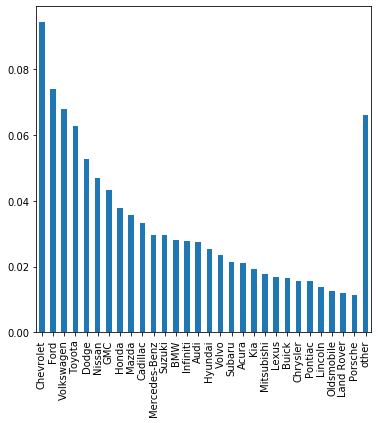

After cleaning , count of categories :  30


In [92]:
cat_prob = car_data.Make.value_counts(normalize=True)
threshold = 0.01
mask = cat_prob > threshold
prob = cat_prob
tail_prob = prob.loc[~mask].sum()
prob = prob.loc[mask]
prob['other'] = tail_prob

fig, ax = plt.subplots(figsize=(6,6))
prob.plot(kind='bar')
plt.show()


# Replacing all tail_prob categories with category 'Other'
tail_prob_indices = cat_prob.loc[~mask].index
car_data.Make= car_data.Make.replace(tail_prob_indices, 'Other')
print('After cleaning , count of categories : ', car_data.Make.nunique())

>##### LabelCount Encoding  
We are using this approach to encode categorical feature 'Make'. This approach finds rank of each category as per their counts.
Step 1: find value_counts of each category.  
Step 2: find rank of each category either in ascending or in Descending order  
Step 3: map each category in acoording to their rank

In [93]:
value_counts = car_data.Make.value_counts().values
cats = car_data.Make.value_counts().index
cat_rank_dict = dict(zip(cats,list(range(1,len(value_counts)+1))))
car_data['encoded_make'] = car_data.Make.map(cat_rank_dict)

#### Encoding 'Model'   
We can see there are 915 unique Models. For this feature also we will use cleaning of categories first to reduce number of features.

In [111]:
model_value_counts = car_data.Model.value_counts()
threshold = 20
values =model_value_counts

mask = values > threshold
tail_values = values.loc[~mask].sum()
values = values.loc[mask]
values['Other'] = tail_values

# Replacing all tail_prob models with model 'Other'
tail_values_indices = model_value_counts.loc[~mask].index
car_data.Model= car_data.Model.replace(tail_values_indices, 'Other')
print('After cleaning , count of categories : ', car_data.Model.nunique())

After cleaning , count of categories :  170


We have reduced number of categories from 915 to 170. Next we need to encode each such 170 categories.  
>##### Encoding using Statistic Approach  
We will group any other numerical variable such as Engine Cylinders' by the feature 'Model'.   
Next we will calculate mean() of each such group. Note Median can be considered if large number of outliers present in MSRP.  
Next we will encode categories with mean value.

In [129]:
means = car_data.groupby(by=['Model'])['highway MPG'].mean()
indices = means.index
values = means.values

dict_mean = dict(zip(indices, values))

#Mapping categories to Mean values
car_data['encoded_model'] = car_data.Model.map(dict_mean)

#### Encoding 'Engine Fuel Type'

There are 11 unique categories in this feature.  
> ##### Data Cleaning  
We are using slightly different approach here to clean categories. We are grouping similar categories. After doing so we are left with 7 categories - Regular, Premium, Flex-Premium, Flex-Others, diesel, electric and natural gas

In [142]:
regular_fules = ['regular unleaded','0    regular unleaded\ndtype: object']
premium_fules = ['premium unleaded (required)','premium unleaded (recommended)']
flex_premium_fuels = ['flex-fuel (premium unleaded required/E85)','flex-fuel (premium unleaded recommended/E85)']
flex_others_fuels = ['flex-fuel (unleaded/E85)', 'flex-fuel (unleaded/natural gas)']

car_data['Engine Fuel Type'] = car_data['Engine Fuel Type'].replace(regular_fules, 'Regular')
car_data['Engine Fuel Type'] = car_data['Engine Fuel Type'].replace(premium_fules, 'Premium')
car_data['Engine Fuel Type'] = car_data['Engine Fuel Type'].replace(flex_premium_fuels, 'Flex-Premium')
car_data['Engine Fuel Type'] = car_data['Engine Fuel Type'].replace(flex_others_fuels, 'Flex-Others')

car_data['Engine Fuel Type'].value_counts()

Regular         7175
Premium         3531
Flex-Others      905
diesel           154
Flex-Premium      80
electric          61
natural gas        2
Name: Engine Fuel Type, dtype: int64

>#### LabelEncoder  
Here we are endoing the feature using **LabelEncoder** which encodes each categories into a label. For. if feature X has 3 categories A , B, C then this encoding scheme will encode A to 0, B to 1 and C to 2.

In [153]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoded_vals = encoder.fit_transform(car_data['Engine Fuel Type'])

car_data['encoded_fuel_type'] = encoded_vals

In [155]:
car_data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP,encoded_make,encoded_model,encoded_fuel_type
0,BMW,Other,2011,Premium,335.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,26,19,3916,46135,14,26.459033,2
1,BMW,Other,2011,Premium,300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650,14,26.459033,2
2,BMW,Other,2011,Premium,300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,20,3916,36350,14,26.459033,2
3,BMW,Other,2011,Premium,230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450,14,26.459033,2
4,BMW,Other,2011,Premium,230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,18,3916,34500,14,26.459033,2


#### Encoding 'Transmission Type'  

There are 5 categories in this feature. No need of cleaning categories for this feature. we will start with encoding the feature directly.  
>##### Dummy Variable Creation  
panda has a function **get_dummies** to create dummy variables for each categories in a feature. So if the feature  has K categories then K dummy variables to be generated. Suitable for small number of categories in a feature. This function returns a dataframe object with dummy variables as column. If feature X has two categories P and Q then this function would create two dummy columns as X_P and X_Q.  
Forour feature it would create 5 dummy bariables such as 'Transmission Type_AUTOMATED_MANUAL', 'Transmission Type_AUTOMATIC' and so on.  
One more point is that after creating dummy variables for a featurecategories, it would drop the feature.

In [157]:
car_data = pd.get_dummies(data=car_data, columns=['Transmission Type'])
car_data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,...,Popularity,MSRP,encoded_make,encoded_model,encoded_fuel_type,Transmission Type_AUTOMATED_MANUAL,Transmission Type_AUTOMATIC,Transmission Type_DIRECT_DRIVE,Transmission Type_MANUAL,Transmission Type_UNKNOWN
0,BMW,Other,2011,Premium,335.0,6.0,rear wheel drive,2.0,"Luxury,Performance",Compact,...,3916,46135,14,26.459033,2,0,0,0,1,0
1,BMW,Other,2011,Premium,300.0,6.0,rear wheel drive,2.0,"Luxury,Performance",Compact,...,3916,40650,14,26.459033,2,0,0,0,1,0
2,BMW,Other,2011,Premium,300.0,6.0,rear wheel drive,2.0,"Luxury,Performance",Compact,...,3916,36350,14,26.459033,2,0,0,0,1,0
3,BMW,Other,2011,Premium,230.0,6.0,rear wheel drive,2.0,"Luxury,Performance",Compact,...,3916,29450,14,26.459033,2,0,0,0,1,0
4,BMW,Other,2011,Premium,230.0,6.0,rear wheel drive,2.0,"Luxury,Performance",Compact,...,3916,34500,14,26.459033,2,0,0,0,1,0


#### Encoding Driven_Wheels   
The feature has 4 categories. We are using custom mapping to encode this feature  
>##### Custom mapping  
we can manually map each category into corresponding numeric value if number of categories are minimal. panda has a function **map** to map categories into numeric value. We are going to use following mappings for this feature,  
front wheel drive - 1  
rear wheel drive - 2  
all wheel drive - 3  
four wheel drive - 4

In [163]:
dict_map = {'front wheel drive' : 1,
            'rear wheel drive' : 2,
            'all wheel drive' : 3,
            'four wheel drive' : 4}
car_data.Driven_Wheels = car_data.Driven_Wheels.map(dict_map)

#### Encoding Market Category  
This feature has 13 distinct categories.
>##### Data Cleaning  
Lets first combine similar categories so that it reduces number of categories. We have reduced number of categories from 13 to 7

In [180]:
luxury = ['Luxury','Luxury,Performance','Luxury,High-Performance']
hatch_back = ['Hatchback,Performance','Hatchback']
crossover = ['Crossover','Crossover,Luxury']
exotic = ['Exotic,High-Performance','Exotic,Luxury,High-Performance','Exotic,Luxury,Performance']

car_data['Market Category'] = car_data['Market Category'].replace(luxury, 'Luxury')
car_data['Market Category'] = car_data['Market Category'].replace(hatch_back, 'Hatchback')
car_data['Market Category'] = car_data['Market Category'].replace(crossover, 'Crossover')
car_data['Market Category'] = car_data['Market Category'].replace(exotic, 'Exotic')
car_data['Market Category'].value_counts()

Flex Fuel           4078
Luxury              2913
Crossover           2565
Hatchback           1013
High-Performance     558
Exotic               445
Performance          336
Name: Market Category, dtype: int64

>#### Target Encoding  
Lets encode the feature using 'Target Encoding' where we will encode each category to the mean/median of target variable grouped by the category.  
We need to group target variable 'MSRP' by feature 'Market Category'. Next we will calcualte mean of each such group .  We have noticed mean values are large values (e.g. 211525.0 ), hence we are doing log transformation of each mean value to scale it to lower values. Finally mapping categories into log transformed value.

In [212]:
import math
target_encoded = car_data.groupby(by=['Market Category'])['MSRP'].agg('mean').apply(lambda x: round(math.log10(x),3))
indices = target_encoded.index
values = target_encoded.values
dict_market_cat = dict(zip(indices,values))

# Mapping dictionary to fetaure 
car_data['Encoded_Market_Category'] = car_data['Market Category'].map(dict_market_cat)

#### Encoding 'Vehicle Size'  
This feature has three unique categories. We will use custom mapping to encode.

In [219]:
car_data['Encoded_Vehicle_Size'] = car_data['Vehicle Size'].map({'Compact': 0, 'Midsize': 1, 'Large':2})

#### Encoding 'Vehicle Style'
This feature has 16 unique categories. Lets  use **LabelEncoder** for encoding this feature

In [223]:
veh_style_encoder = LabelEncoder()

encoded_val = veh_style_encoder.fit_transform(car_data['Vehicle Style'])
car_data['Encoded_Vehicle_Style'] = encoded_val

We are done withh categorical conversion of all categorical features. Its time to eliminate features which has encoded and stored in news columns.

#### Feature Elimination

In [226]:
feature_list = ['Make','Model','Engine Fuel Type','Market Category','Vehicle Size', 'Vehicle Style']
car_data.drop(feature_list, axis=1, inplace=True)

### Multicolinearity Check

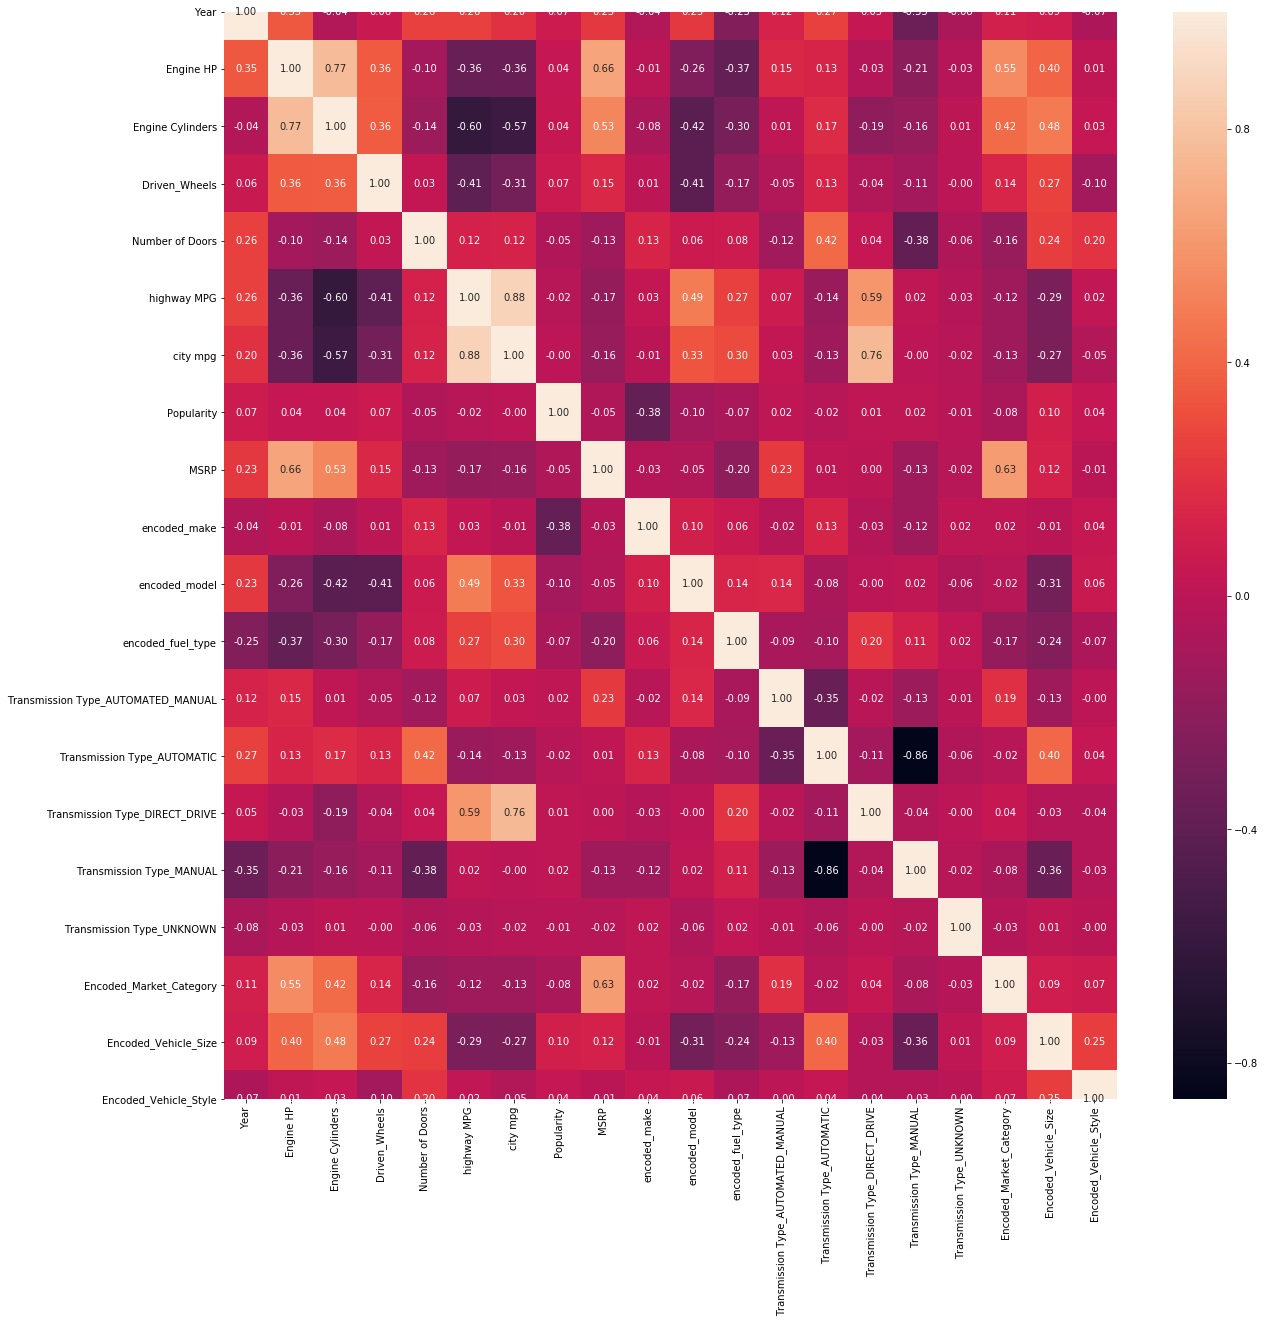

In [229]:
corr_matrix = car_data.corr()

fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(car_data.corr(), fmt='.2f', cbar=True, annot=True, ax=ax)
plt.show()

> None of the features are strongly correlated

### Seperating out Features and Target Variable

In [230]:
X = car_data.drop('MSRP', axis=1)
Y = car_data.MSRP

### Train and Test Splitting

In [233]:
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size=0.2)
print('X_Train Shape ', X_Train.shape)
print('X_Test Shape ', X_Test.shape)
print('Y_Train Shape ', Y_Train.shape)
print('Y_Test Shape ', Y_Test.shape)

X_Train Shape  (9526, 19)
X_Test Shape  (2382, 19)
Y_Train Shape  (9526,)
Y_Test Shape  (2382,)


### Building Decision Tree Model

In [234]:
from sklearn.tree import DecisionTreeRegressor
treeModel = DecisionTreeRegressor(max_depth=3)
treeModel.fit(X_Train, Y_Train)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [238]:
Y_Pred = treeModel.predict(X_Test)

(489      36115
 8233      2000
 8242     60000
 161      40250
 6083     29165
          ...  
 10108     2749
 506      71400
 353      37070
 11189     2000
 10769    21620
 Name: MSRP, Length: 2382, dtype: int64,
 array([33139.63107064,  2538.51047904, 33139.63107064, ...,
        33139.63107064,  2538.51047904, 33139.63107064]))

In [243]:
# Evaluating
from sklearn.metrics import r2_score, mean_squared_error
r2_score = r2_score(Y_Test,Y_Pred)
mse = mean_squared_error(Y_Test, Y_Pred)

print('R2 Score ', r2_score)
print('Mean Squared Error ', mse)

R2 Score  0.8182611947511719
Mean Squared Error  725489075.0656906


> We have achieved r2_score of 81%.

In [249]:
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=10)

max_attributes = len(X_Train.columns)
depth_range = range(1, max_attributes+1)

accuracy_scores = {}
for depth in depth_range:
    
    treeClf = DecisionTreeRegressor(max_depth=depth)
    
    score = []
    
    for train_indices, valid_indices in cv.split(X_Train,Y_Train):
        
        training_sample = car_data.iloc[train_indices]
        validation_sample = car_data.iloc[valid_indices]
        
        features = training_sample.drop('MSRP', axis=1)
        target = training_sample.MSRP
        
        treeClf.fit(features, target)
        
        validation_score = treeClf.score(X=validation_sample.drop('MSRP', axis=1),
                                        y= validation_sample.MSRP)
        score.append(validation_score)
    
    avg_accuracy = sum(score)/len(score)

    accuracy_scores[depth] = avg_accuracy

C:\Users\NMiyaX0106539\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\NMiyaX0106539\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\NMiyaX0106539\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\NMiyaX0106539\AppData\Local\Continuum\anaconda3\lib\site-p

In [250]:
accuracy_scores

{1: 0.40341777917539384,
 2: 0.6238186099503789,
 3: 0.7338356273073285,
 4: 0.8294573601033068,
 5: 0.8667480083911634,
 6: 0.8069548125785735,
 7: 0.8320311574427611,
 8: 0.8364986853074532,
 9: 0.838747485911326,
 10: 0.8443958125437139,
 11: 0.8461537088291525,
 12: 0.8459765946044154,
 13: 0.8448659824319362,
 14: 0.8463372407937232,
 15: 0.847039084904786,
 16: 0.8482019041180507,
 17: 0.8483964957494698,
 18: 0.8487925341045089,
 19: 0.8474982344985454}

> Notice the tree has highest accuracy score at depth = 18. Lets retrain the model with 18 depth

In [252]:
treeModel = DecisionTreeRegressor(max_depth=18)
treeModel.fit(X_Train, Y_Train)
Y_Pred = treeModel.predict(X_Test)
# Evaluating
from sklearn.metrics import r2_score, mean_squared_error
r2_score = r2_score(Y_Test,Y_Pred)
mse = mean_squared_error(Y_Test, Y_Pred)

print('R2 Score ', r2_score)
print('Mean Squared Error ', mse)

R2 Score  0.9560553485002433
Mean Squared Error  175424090.23208946


> Wooooow!!!! Acheived an accuracy score of 95%.